In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA
import seaborn as sns


In [4]:

### Esta celda, por el momento no se va a utilizar, sirvió para el ejemplo inicial. 
def mostrar_digito(digito):
    digito = digito.reshape(8, 8)

    plt.imshow(digito, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

Carga de datos:

In [5]:
#Definiendo paths
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

#diccionario, definicion de llaves
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()

## carga de datos utilizando numpy
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)



In [6]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [7]:
len(features)


10222

Se pasa a pandas el set de datos:

In [9]:
pdFeatures= pd.DataFrame(features)

pdFeatures.head()
## se observan por la instrucción head, 5 filas y 2048 columnas


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.415009,0.301331,0.424651,0.038742,1.105400,0.091647,0.102199,0.100222,0.102803,0.199128,...,0.679334,0.042565,0.289760,0.048728,0.577778,0.129517,0.058862,0.052040,0.134156,0.505269
1,0.245439,1.132504,0.263267,0.197686,0.403056,0.042337,0.161456,0.219616,0.120143,0.070168,...,1.157374,0.071143,0.048955,0.033452,0.186528,0.116973,0.207605,0.477137,0.065348,0.076046
2,0.211031,0.227735,0.078692,0.179440,0.428502,0.000960,0.069846,0.524408,0.380936,0.349437,...,0.880030,0.149061,0.381416,0.791476,0.276790,0.331998,1.142231,0.241350,0.152601,0.138696
3,0.188835,0.214621,0.430704,0.056100,0.103905,0.461142,0.045819,0.008077,0.026903,0.031911,...,0.776182,0.436186,0.019146,0.093014,0.322295,0.932094,0.064720,0.257340,0.523037,0.163814
4,0.219879,0.361626,0.077862,0.005002,0.255253,0.479375,0.096411,0.264948,0.282627,0.158179,...,0.832879,0.214045,0.304193,0.338655,0.006227,0.403406,0.551444,0.343893,1.274768,0.292337


Normalizacion de datos:

In [27]:
from sklearn import preprocessing

## Se instancia el objeto para preprocesar los datos
min_max_scaler = preprocessing.MinMaxScaler()

scaledFeatures = min_max_scaler.fit_transform(pdFeatures)
#df = pandas.DataFrame(x_scaled)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


AttributeError: 'DataFrame' object has no attribute 'target'

Tipo de datos:

In [20]:
print(type(scaledFeatures))
print(scaledFeatures[:4,:])



<class 'numpy.ndarray'>
[[0.26606285 0.12718312 0.16464445 ... 0.02830172 0.05601674 0.20787722]
 [0.15669976 0.47799777 0.10207321 ... 0.25949141 0.02728588 0.03128687]
 [0.13450845 0.09612024 0.03051042 ... 0.13125834 0.06371825 0.05706205]
 [0.12019347 0.09058526 0.16699126 ... 0.13995452 0.21839328 0.06739623]]


Notar que tiene las mismas dimensiones, pero que los valores ahora están entre cero y uno

In [21]:
print(scaledFeatures.shape)


(10222, 2048)


# Cargando los Datos (MNIST)

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [23]:
#### PCA a 2 dimensiones ######

pca= PCA(n_components=2)
X2D = pca.fit_transform(scaledFeatures)
dfTransformado=pd.DataFrame(data=X2D,
                            columns=['Componente principal 1',
                                     'Componente principal 1'])

Text(0, 0.5, 'component 2')

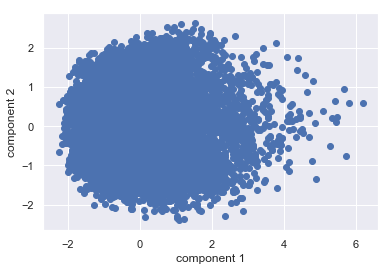

In [24]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')


In [28]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

NameError: name 'digits' is not defined

## K-means Clustering con Sklearn

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
## K-means


In [ ]:
clusters = ## clustes de kmeans

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
kmeans.cluster_centers_

In [ ]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
